In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import random

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

: 

In [2]:
(images, labels), (test_images, test_labels) = mnist.load_data()

In [3]:
images.shape

(60000, 28, 28)

In [4]:
labels.shape

(60000,)

In [5]:
labels.min(), labels.max()

(0, 9)

# Red neuronal

In [6]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [7]:
inp = Input((28,28))
flattened = Flatten()(inp)
dense1 = Dense(96, activation='relu')(flattened)
dense2 = Dense(48, activation='relu')(dense1)
final = Dense(10, activation='softmax')(dense2)

model = Model(inputs=inp, outputs=final)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │        75,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,506 (314.48 KB)

 Trainable params: 80,506 (314.48 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:

X_train, X_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.1, random_state=42)

print(type(X_train))

<class 'numpy.ndarray'>


In [9]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
hst = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7861 - loss: 4.7679 - val_accuracy: 0.9068 - val_loss: 0.4597
Epoch 2/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9118 - loss: 0.4026 - val_accuracy: 0.9260 - val_loss: 0.3369
Epoch 3/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9312 - loss: 0.2758 - val_accuracy: 0.9228 - val_loss: 0.3806
Epoch 4/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9415 - loss: 0.2391 - val_accuracy: 0.9337 - val_loss: 0.2591
Epoch 5/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9487 - loss: 0.1945 - val_accuracy: 0.9432 - val_loss: 0.2361
Epoch 6/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9548 - loss: 0.1628 - val_accuracy: 0.9425 - val_loss: 0.2468
Epoch 7/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9612 - loss: 0.1406 - val_accuracy: 0.9445 - val_loss: 0.2255
Epoch 8/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9641 - loss: 0.1370 - 

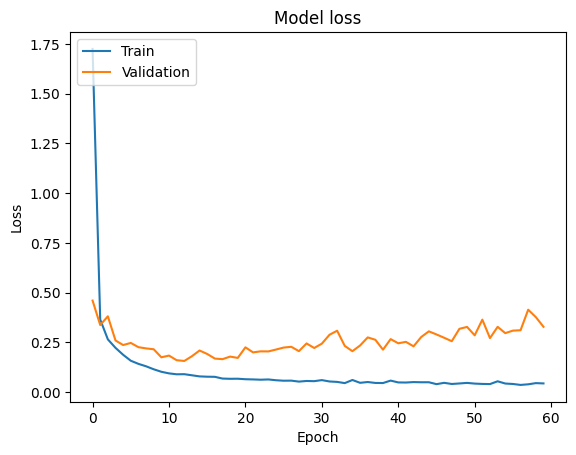

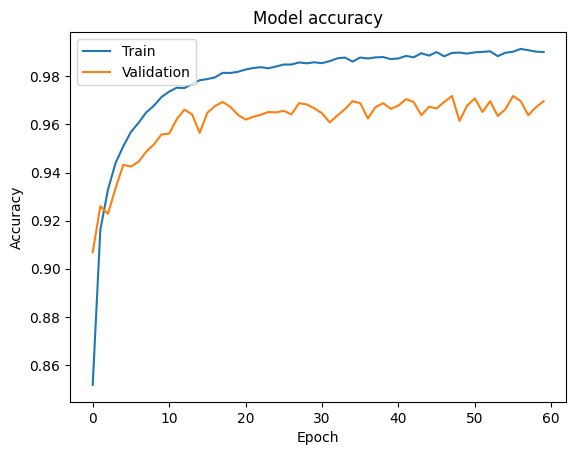

In [11]:

plt.plot(hst.history['loss'])
plt.plot(hst.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hst.history['accuracy'])
plt.plot(hst.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Early stopping

In [12]:
inp = Input((28,28))
flattened = Flatten()(inp)
dense1 = Dense(96, activation='relu')(flattened)
dense2 = Dense(48, activation='relu')(dense1)
final = Dense(10, activation='softmax')(dense2)

model = Model(inputs=inp, outputs=final)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 96)             │        75,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 48)             │         4,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,506 (314.48 KB)

 Trainable params: 80,506 (314.48 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

hst = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid), callbacks=[early_stop])

Epoch 1/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.7241 - loss: 5.6712 - val_accuracy: 0.8780 - val_loss: 0.4989
Epoch 2/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.8904 - loss: 0.4321 - val_accuracy: 0.9102 - val_loss: 0.3217
Epoch 3/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.9237 - loss: 0.2864 - val_accuracy: 0.9327 - val_loss: 0.2487
Epoch 4/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.9411 - loss: 0.2201 - val_accuracy: 0.9262 - val_loss: 0.3022
Epoch 5/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.9509 - loss: 0.1804 - val_accuracy: 0.9362 - val_loss: 0.2416
Epoch 6/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.9570 - loss: 0.1594 - val_accuracy: 0.9457 - val_loss: 0.2347
Epoch 7/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.9622 - loss: 0.1402 - val_accuracy: 0.9422 - val_loss: 0.2422
Epoch 8/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.9656 -

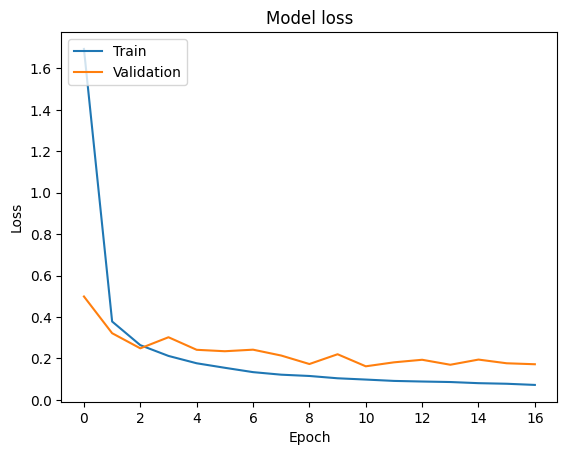

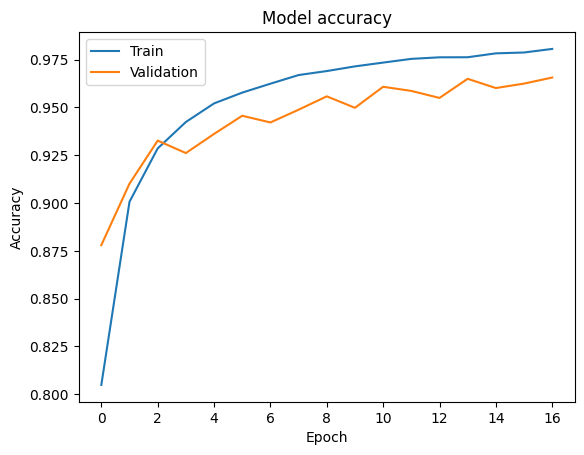

In [15]:

plt.plot(hst.history['loss'])
plt.plot(hst.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hst.history['accuracy'])
plt.plot(hst.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
preds = np.argmax(model.predict(test_images), axis=1)
preds.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


(10000,)

In [17]:
accuracy_score(test_labels, preds)

0.9609

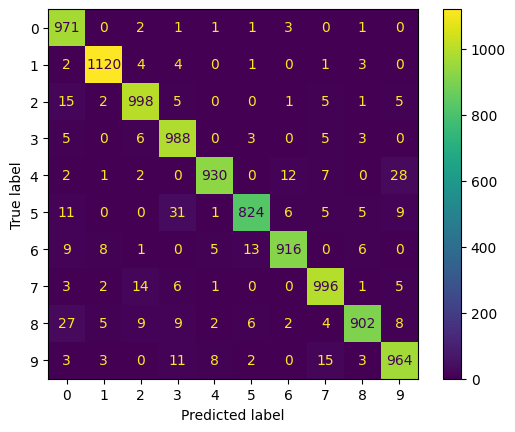

In [18]:
ConfusionMatrixDisplay(confusion_matrix(test_labels, preds)).plot()
